# Quick Start (oda api v1.1.26)

In [ ]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os

from oda_api.token import discover_token

import logging

logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger('oda_api').addHandler(logging.StreamHandler())

## Connection to the dispatcher 

In [ ]:
#TODO: change to prod
disp=DispatcherAPI(url='https://frontend-staging.obsuks1.unige.ch/mmoda/dispatch-data',instrument='mock')
# disp=DispatcherAPI(url='http://0.0.0.0:8001',instrument='mock')


In [ ]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

### get the description of the instrument

In [ ]:
disp.get_instrument_description('jemx')

In [48]:
tstart='2021-02-01T00:00:00'
tstop='2021-02-27T23:59:59'
source_name="GX 1+4"
E1_keV=28.
E2_keV=50.
RA=263
DEC=-24.7456
detection_threshold=7.0

data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_spectrum',
                                 T1=tstart,
                                 T2=tstop,
                                 osa_version='OSA11.1',
                                 src_name=source_name,
                                 RA=RA,
                                 DEC=DEC,
                                 E1_keV=E1_keV,
                                 E2_keV=E2_keV,
                                 integral_data_rights="public",
                                 detection_threshold=detection_threshold,
                                 off_line="False",
                                 radius=8.,
                                 product_type='Dummy'
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pas

dig_list unable to literal_eval integral_data_rights; problem malformed node or string: <_ast.Name object at 0x7f04f3867e50>
dig_list unable to literal_eval integral_data_rights; problem malformed node or string: <_ast.Name object at 0x7f04f3867e50>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04f3867dc0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04f3867dc0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04f3867dc0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04f3867dc0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04f3867dc0>
dig_list unable to literal_eval E2_keV; problem malformed node or string: <_ast.Name object at 0x7f04f38674c0>
dig_list unable to literal_eval E2_keV; problem malformed node or string: <_ast.Name

None


## We upload the product to the gallery, configuring the parameters we wish to show in the gallery

### For the data product we wish to upload the following parameters can be set:
* **instrument**: name of the instrument used for the generated product (e.g. `isgri`, `jemx1`)
* **product_type**: type of product generated (e.g. `isgri_lc`, `jemx_image`)
* **product_title**: title to assign to the product, in case this is not provided, then a title is automatically built using the name of the source and the type of product
* **observation**: this can be indicated in two different ways
 * by specifying the id of an already present observation (eg 'test observation')
 * by specifying the time range, in particular the value of `T1` and `T2` in the following format `'2003-03-15T23:27:40.0'`
* **source**: this has to be the name of a known source (eg Crab, Cyg X-1)
* **produced_by**: direct link to the notebook used to generated the product
* **gallery_image_path**: path of the generated image and to be uploaded over the gallery
* **fits_file_path**: a list of fits file links used for the generation of the product to upload over the gallery

In [44]:
import oda_api.plot_tools

token = discover_token()

instrument = 'isgri'
product_type = 'isgri_spectrum'

RA=55
DEC=46
E1_keV=20
E2_keV=40

notebook_link='https://github.com/oda-hub/oda_api/blob/master/doc/source/user_guide/UploadToGallery.ipynb'

searching for token in environment variable ODA_TOKEN
searching for token in environment variable ODA_TOKEN
searching for token in environment variable ODA_TOKEN
searching for token in environment variable ODA_TOKEN
searching for token in environment variable ODA_TOKEN
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
searching for token in file in current directory
searching for token in file in current directory
searching for token in file in current directory
searching for token in file in current directory
searching for token in file in current directory
failed to find token with current method: file in curre

### Example of a spectrum product

In [45]:
image_product = oda_api.plot_tools.OdaSpectrum(data_collection)
img_fn = image_product.get_image_for_gallery(in_source_name=source_name, xlim=[20, 100])

d = disp.post_data_product_to_gallery(token=token,
                                      rA=RA, DEC=DEC, e1_kev=E1_keV, e2_kev=E2_keV,
                                      instrument=instrument, product_type=product_type,
                                      product_title=source_name,
                                      src_name=source_name,
                                      produced_by=notebook_link,
                                      gallery_image_path=img_fn,
                                      T1=tstart,T2=tstop
                                     )

source GX 1+4 not found in spectral products
source GX 1+4 not found in spectral products
source GX 1+4 not found in spectral products
source GX 1+4 not found in spectral products
source GX 1+4 not found in spectral products
Posting a product on the gallery
Posting a product on the gallery
Posting a product on the gallery
Posting a product on the gallery
Posting a product on the gallery
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1600
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1600
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1600
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1600
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1600


### Example of a light curve product

In [56]:
tstart='2021-02-01T00:00:00'
tstop='2021-02-27T23:59:59'
source_name='OAO 1657-415'
E1_keV=28.
E2_keV=50.
RA=263
DEC=-24.7456
detection_threshold=7.0

data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_lc',
                                 T1=tstart,
                                 T2=tstop,
                                 osa_version='OSA11.1',
                                 src_name=source_name,
                                 RA=RA,
                                 DEC=DEC,
                                 E1_keV=E1_keV,
                                 E2_keV=E2_keV,
                                 integral_data_rights='public',
                                 detection_threshold=detection_threshold,
                                 off_line='False',
                                 radius=8.,
                                 product_type='Dummy'
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pas

dig_list unable to literal_eval integral_data_rights; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval integral_data_rights; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E1_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e5b3a0>
dig_list unable to literal_eval E2_keV; problem malformed node or string: <_ast.Name object at 0x7f04d2e6bb20>
dig_list unable to literal_eval E2_keV; problem malformed node or string: <_ast.Name

OAO 1657-415
OAO 1657-415
OAO 1657-415
OAO 1657-415
OAO 1657-415
Original length of light curve 2
Original length of light curve 2
Original length of light curve 2
Original length of light curve 2
Original length of light curve 2
Final length of light curve 2 
Final length of light curve 2 
Final length of light curve 2 
Final length of light curve 2 
Final length of light curve 2 
Get time bin directly from light curve
Get time bin directly from light curve
Get time bin directly from light curve
Get time bin directly from light curve
Get time bin directly from light curve


('./IBIS_lc_OAO_1657-415.fits', 52713.97884473118, 52713.999619039634, 1198.96181423961)


TypeError: expected str, bytes or os.PathLike object, not tuple

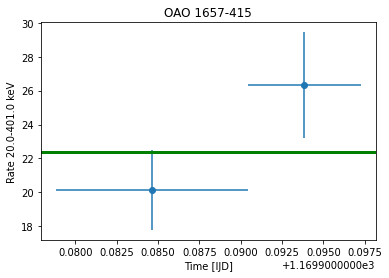

In [61]:
image_product = oda_api.plot_tools.OdaLightCurve(data_collection)
img_fn = image_product.get_image_for_gallery( in_source_name=source_name)

fits_file_fn = image_product.write_fits(source_name=source_name)[0]
print(fits_file_fn)
                                             
d = disp.post_data_product_to_gallery(token=token,
                                           RA=RA, DEC=DEC, e1_kev=E1_keV, e2_kev=E2_keV,
                                           product_title=source_name,
                                           gallery_image_path=img_fn,
                                           fits_file_path=[fits_file_fn],
                                           src_name=source_name,
                                           instrument='jemx1',
                                           product_type='jemx_lc',
                                           produced_by=notebook_link,
                                           observation_id=source_name+'_'+tstart+'-'+tstop
                                          )